In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd

Function to plot two-dimensional scatter plots, optionally with clring according to the labels. 

In [3]:
def plot(x_1,x_2, labels=None, title="", xlabel="x", ylabel="y"):
    if labels is None:
        plt.scatter(x_1, x_2, s=25, alpha=0.5, cmap="Set2")
    else:
        plt.scatter(x_1, x_2, c=labels, s=25, alpha=0.5, cmap="Set2")
    plt.axhline(y=0, color='r', alpha=0.5)
    plt.axvline(x=0, color='r', alpha=0.5)
    plt.axis('equal')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

# 1. Data Import 

In [4]:
iris = datasets.load_iris()
D = iris.data
y = iris.target

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The iris dataset has 150 observations of 4 features.

In [6]:
D.shape

(150, 4)

The target variable is ordinal encoded: 

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The class names are given in the following list:

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. Data Description and Visualization

For some operations, it's better to use the data representation as a numpy array, for sme it's better to use the functionalities of pandas data frames. We create a data frame for the iris dataset like this:

In [29]:
df = pd.DataFrame(D)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The main summary statistics of the data can be queried with the `describe` command in `pandas`: 

In [13]:
# This will only return summary statistics for the numeric columns
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Scatter- and Boxplots

`pandas`, by means of the `plotting` module, allows for the visualization of a scatter matrix. The plot shows **bivariate relationships** in the off diagonals, and the **univariate distributions (histograms)** in the diagonal. 

Let's now visualize the scatter matrix; data points in the off-diagonal will be colored by class: 

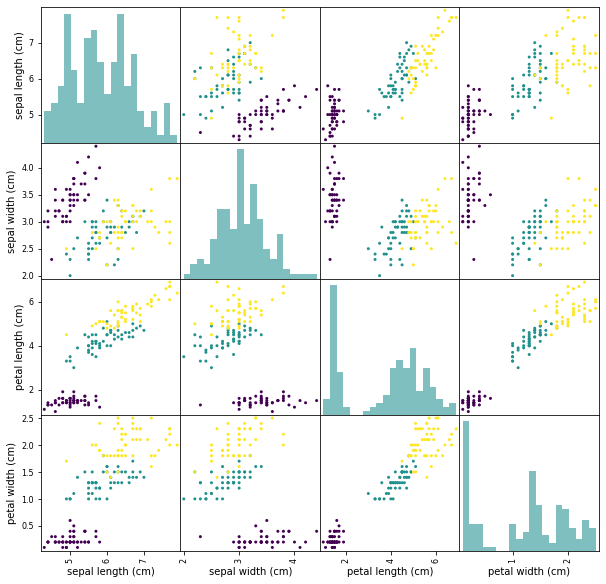

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c =pd.DataFrame(y), figsize=(10,10),  # c : color acording to classes
               hist_kwds={'color':'teal','bins':20, 'alpha':0.5}, alpha=1.)
plt.show()

We can also easily get a boxplot of the data frame:

<AxesSubplot:>

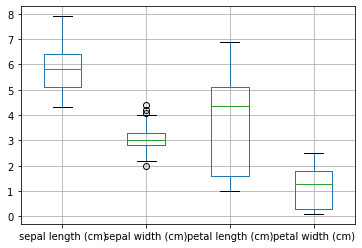

In [15]:
df.boxplot()

## Visualizations Based on Dimensionality Reduction

Interpreting the scatter plot matrix is not always easy. Hence, using a method to generate projections of the data which are plottable in 2D might be helpful to get an interpretable glimpse at the data and possible issues. We usue the sklearn implementations of PCA and t-SNE to get a low-dimensional view of the data. 

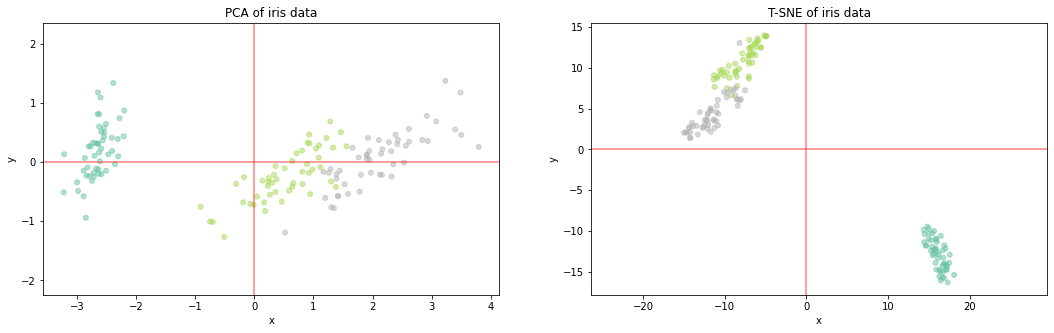

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.figure(2, figsize=(18, 5))
plt.subplot(1,2,1)
pca = PCA(n_components=2)
D_pca = pca.fit_transform(D)  
plot(D_pca[:, 0], D_pca[:,1], y, title="PCA of iris data")
plt.subplot(1,2,2)
D_tsne= TSNE().fit_transform(D)
plot(D_tsne[:, 0], D_tsne[:,1], y, title="T-SNE of iris data")

# 3. Feature Transformations

Generating new single features is relatively straightforward with pandas dataframes.

In [30]:
df_new = df.copy(deep=False)
df_new["sep len*pet len"] = df_new["sepal length (cm)"] * df_new["petal length (cm)"]
df_new["3sep len + 2pet len"] = 3*df_new["sepal length (cm)"] + 2*df_new["petal width (cm)"]
df_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sep len*pet len,3sep len + 2pet len
0,5.1,3.5,1.4,0.2,7.14,15.7
1,4.9,3.0,1.4,0.2,6.86,15.1
2,4.7,3.2,1.3,0.2,6.11,14.5
3,4.6,3.1,1.5,0.2,6.90,14.2
4,5.0,3.6,1.4,0.2,7.00,15.4


## Scaling

We briefly show how to perform scaling operations with sklearn

### Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
D_standardized = StandardScaler().fit_transform(D)

We create a dataframe of the standardized data matrix `D_standardized` and use the `describe` function to get the new statistics. We see now that the features have zero mean and a standard deviation of 1.

In [13]:
df_standardized = pd.DataFrame(D_standardized)
df_standardized.describe().round(2)

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


<AxesSubplot:>

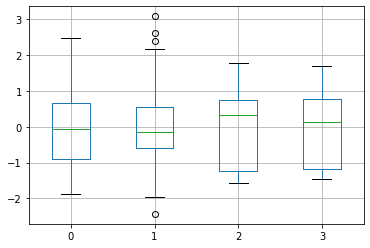

In [14]:
df_standardized.boxplot()

But we can see that standardization affected the low-dimensional views a bit: the grey and green classes seem to be more intertwined now in 2D.  

### Min-Max Scaling 

In [15]:
from sklearn.preprocessing import MinMaxScaler
D_01_scaled = MinMaxScaler().fit_transform(D)

We see now that the 0-1-scaled data is in the range from 0 to 1:

In [16]:
df_01_scaled = pd.DataFrame(D_01_scaled)
df_01_scaled.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

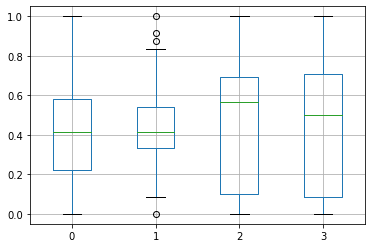

In [17]:
df_01_scaled.boxplot()

### Robust Scaling

In [18]:
from sklearn.preprocessing import RobustScaler
D_robust_scaled = RobustScaler().fit_transform(D)

In [19]:
df_robust_scaled = pd.DataFrame(D_robust_scaled)
df_robust_scaled.describe()

,0,1,2,3
count,150.000000,150.000000,1.500000e+02,150.000000
mean,0.033333,0.114667,-1.691429e-01,-0.067111
std,0.636974,0.871733,5.043709e-01,0.508158
min,-1.153846,-2.000000,-9.571429e-01,-0.800000
25%,-0.538462,-0.400000,-7.857143e-01,-0.666667
50%,0.000000,0.000000,1.266348e-16,0.000000
75%,0.461538,0.600000,2.142857e-01,0.333333
max,1.615385,2.800000,7.285714e-01,0.800000


<AxesSubplot:>

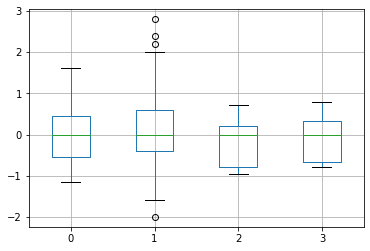

In [23]:
df_robust_scaled.boxplot()

### Comparison of the scalers

We can have a look how the scaling affects the views we get when we plot two features against each other. You can select the features to be compared with the indices `i` and `j`.

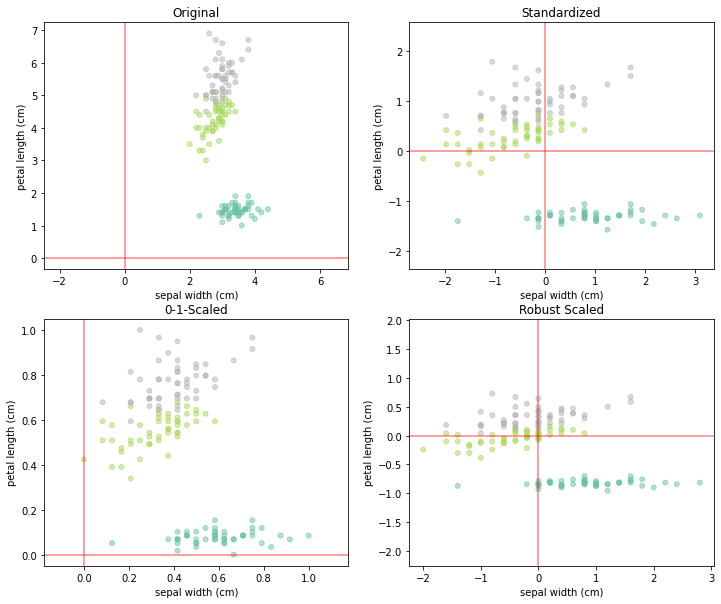

In [20]:
i,j=1,2 #feature index 
plt.figure(2, figsize=(12, 10))
plt.subplot(2,2,1)
plot(D[:, i], D[:,j], y, title="Original", xlabel= iris.feature_names[i], ylabel= iris.feature_names[j])
plt.subplot(2,2,2)
plot(D_standardized[:, i], D_standardized[:, j], y, title="Standardized", xlabel= iris.feature_names[i], ylabel= iris.feature_names[j])
plt.subplot(2,2,3)
plot(D_01_scaled[:, i], D_01_scaled[:, j], y, title="0-1-Scaled", xlabel= iris.feature_names[i], ylabel= iris.feature_names[j])
plt.subplot(2,2,4)
plot(D_robust_scaled[:, i], D_robust_scaled[:, j], y, title="Robust Scaled", xlabel= iris.feature_names[i], ylabel= iris.feature_names[j])

Effect of the scalers on the similarities in the data, as reflected by created low-dimensional views.

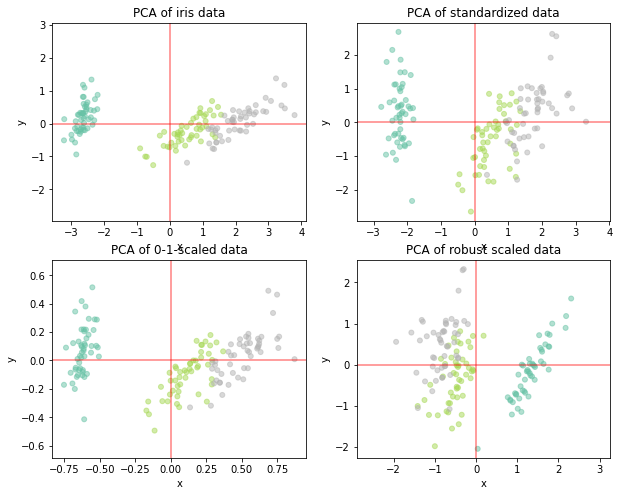

In [21]:
plt.figure(2, figsize=(10, 8))
plt.subplot(2,2,1) 
D_pca = PCA(n_components=2).fit_transform(D)  
plot(D_pca[:, 0], D_pca[:,1], y, title="PCA of iris data")
plt.subplot(2,2,2)
D_pca = PCA(n_components=2).fit_transform(D_standardized)  
plot(D_pca[:, 0], D_pca[:,1], y, title="PCA of standardized data")
plt.subplot(2,2,3)
D_pca = PCA(n_components=2).fit_transform(D_01_scaled)  
plot(D_pca[:, 0], D_pca[:,1], y, title="PCA of 0-1-scaled data")
plt.subplot(2,2,4)
D_pca = PCA(n_components=2).fit_transform(D_robust_scaled)  
plot(D_pca[:, 0], D_pca[:,1], y, title="PCA of robust scaled data")

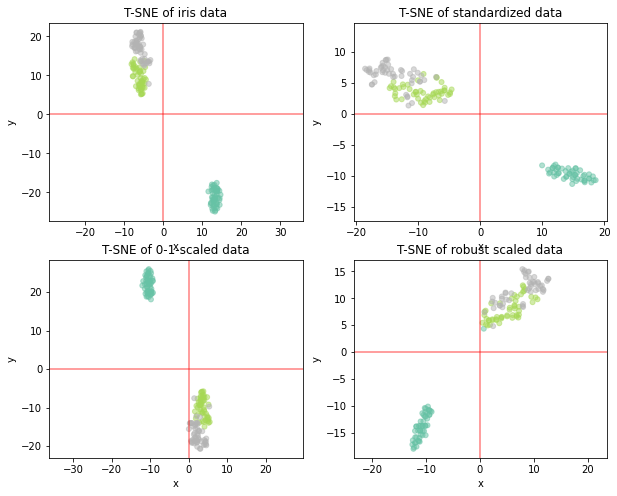

In [22]:
plt.figure(2, figsize=(10, 8))
plt.subplot(2,2,1) 
D_tsne= TSNE().fit_transform(D)
plot(D_tsne[:, 0], D_tsne[:,1], y, title="T-SNE of iris data")
plt.subplot(2,2,2)
D_tsne= TSNE().fit_transform(D_standardized)
plot(D_tsne[:, 0], D_tsne[:,1], y, title="T-SNE of standardized data")
plt.subplot(2,2,3)
D_tsne= TSNE().fit_transform(D_01_scaled)
plot(D_tsne[:, 0], D_tsne[:,1], y, title="T-SNE of 0-1-scaled data")
plt.subplot(2,2,4)
D_tsne= TSNE().fit_transform(D_robust_scaled)
plot(D_tsne[:, 0], D_tsne[:,1], y, title="T-SNE of robust scaled data")

## Feature Selection
### Variance Thresholding

In [31]:
from sklearn.feature_selection import VarianceThreshold

We apply the sklearn Variance threshold with a threshold of 0.5. We see that this threshold leads to the removal of one feature.

In [32]:
thresholder = VarianceThreshold(threshold=.5)

D_var_threshol = thresholder.fit_transform(df)
D_var_threshol.shape

(150, 3)

We have a look at the features which are selected and see that "sepal width" is now missing from the list of features.

In [33]:
np.array(iris.feature_names)[thresholder.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

We plot the dimensionality reductions of the thresholded data and see that actually the green and the grey class are now a bit better separated.

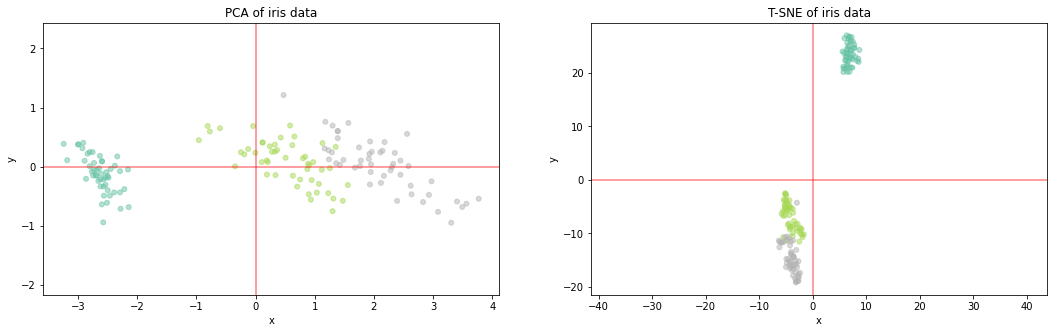

In [34]:
plt.figure(2, figsize=(18, 5))
plt.subplot(1,2,1)
pca = PCA(n_components=2)
D_pca = pca.fit_transform(D_var_threshol)  
plot(D_pca[:, 0], D_pca[:,1], y, title="PCA of iris data")
plt.subplot(1,2,2)
D_tsne= TSNE().fit_transform(D_var_threshol)
plot(D_tsne[:, 0], D_tsne[:,1], y, title="T-SNE of iris data")

## Correlation Feature Selection

We have a look at the correlations between variables and see that the highest correlati0n we have is between petal width and petal length (0.96). So, let's delete petal width and have a look how it affects the low-dimensional view.

In [35]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [36]:
D_corr_threshold = np.delete(D,3,1) #delete column with index 2 (petal width)
D_corr_threshold.shape

(150, 3)

We plot the dimensionality reductions of the correlation thresholded data and see that it didn't really help to differentiate the grey and green classes, but it also didn't change much.

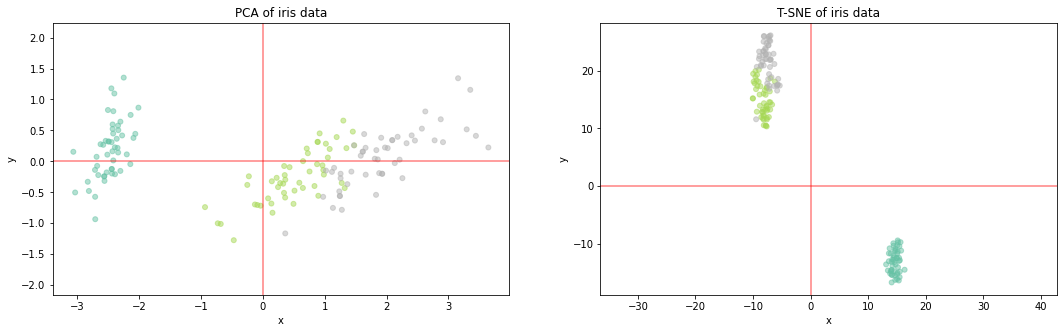

In [37]:
plt.figure(2, figsize=(18, 5))
plt.subplot(1,2,1)
pca = PCA(n_components=2)
D_pca = pca.fit_transform(D_corr_threshold)  
plot(D_pca[:, 0], D_pca[:,1], y, title="PCA of iris data")
plt.subplot(1,2,2)
D_tsne= TSNE().fit_transform(D_corr_threshold)
plot(D_tsne[:, 0], D_tsne[:,1], y, title="T-SNE of iris data")